In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker

import seaborn as sns
import pandas as pd
import json
import numpy as np
import pickle
import sentencepiece

In [3]:
with open("ATTENTION", "rb") as fp:  # Unpickling
    scores = pickle.load(fp)
    scores = np.array(scores)
scores.shape

(150, 5, 8, 1, 1162)

In [4]:
mean_scores1 = np.mean(scores, axis=1)
mean_scores2 = np.mean(mean_scores1, axis=1)
mean_scores3 = np.mean(mean_scores2, axis=1)
mean_scores3.shape

(150, 1162)

In [5]:
ls = []
for i in range(0,8): # 8 heads
    ls.append(scores[:, 0, i, 0,:])

ls = np.array(ls)
ls.shape

(8, 150, 1162)

In [6]:
ls = np.mean(ls, axis=0)
ls.shape
# x = np.array([
#     [[2,2],[2,2], [2,2],[2,2]],
#     [[8,4],[4,5], [4,4],[4,4]],
#     [[8,8],[8,16], [8,8],[8,16]]
#     ])
# x.shape

(150, 1162)

In [7]:
# spm = sentencepiece.SentencePieceProcessor()
# spm.Load("../vocab/vocab.model")

# pred = "6   12    4  156   28   12    4  156   28   12  286    7    8  652   94    7   58    5  157    6  169    6 5    8  156   28   12   13   15    5  157    6  169    6    5   13   15   19   12   13   15    5    8  209   52   51   67  276   10   32 30"
# src = "18   137     4    47     7   336    28   960  1606    11  1797   618  1583   758    87    24 11832    22    17  2136  3900   626    24 12511    22    20    27  2247    11  7502     9  5044     6    23   229    51    31   960  3089    11  1797   618  1583   758    55    24   275    10 10268     9 23073  7942    22     5   104   426    10    23    64   146   139   241   268    48  1606    11  1797    55     6     4   356   156     7    23    64   347    30     4   110  2836    11  6193   267    59  6127   360    17   267    95  3177    34    23   229     5   114     4   180     7     4   605 45  1522    34  2509   350    18   193     8    86   203    24   960    22  1583   304    17     4   150  9894   618  1583   758    47    24   110   392     9   339    12    14     0  7826  9013     5 15404  9013   418    22    19    62  2279     5   136    26   166     8   150  9894  2669   460   678   723     5 11141 28482     5 12641   342     8   618    12   473   678   723     5 11141 28482     5 12641     7   661   436   25    71   119   439 22055     5    84     4   605  9564    27 27780    28     5    18   347     8   960   618  1583   304    20  3909   195   460 36842  1700     9"

# trans = spm.DecodeIds([int(x.strip()) for x in src.split()])
# print(len(trans.split()), len([int(x.strip()) for x in src.split()]))

C:\Users\hmkg1\AppData\Local\Temp\ipykernel_29988\3783059173.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
C:\Users\hmkg1\AppData\Local\Temp\ipykernel_29988\3783059173.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)


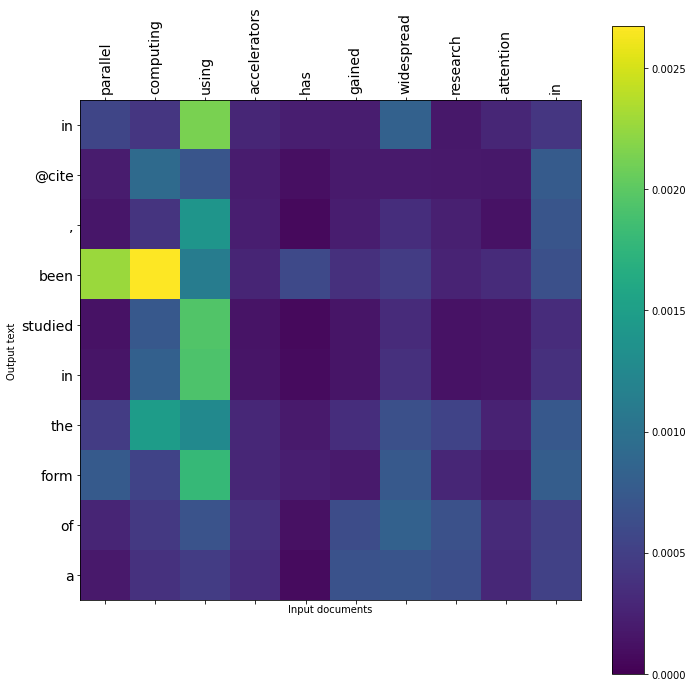

In [22]:
def groupedAvg(myArray, N=2):
    result = np.cumsum(myArray, 0)[N-1::N]/float(N)
    result[1:] = result[1:] - result[:-1]
    return result

def plot_attention(attention, sentence, predicted_sentence, legend=None):
    # sentence = tf_lower_and_split_punct(sentence).numpy().decode().split()
    # predicted_sentence = predicted_sentence.numpy().decode().split() + ['[END]']
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)

    attention = attention[:len(predicted_sentence), :len(sentence)]

    cax = ax.matshow(attention, cmap='viridis', vmin=0.0)
    fig.colorbar(cax)
    fontdict = {'fontsize': 14}

    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    ax.set_xlabel('Input documents')
    ax.set_ylabel('Output text')
    # plt.suptitle('Attention weights')

    if legend != None:
        ax.annotate('\n'.join(legend),
            xy=(10, 0.1),
            xycoords='figure pixels',
            horizontalalignment='left',
            verticalalignment='bottom')

    plt.tight_layout()
    plt.savefig("7doc.svg", bbox_inches='tight', pad_inches=0)
    plt.show()

src = "parallel computing using accelerators has gained widespread research attention in the past few years. in particular , using gpus for general purpose computing has brought forth several success stories with respect to time taken , cost , power , and other metrics. however , accelerator based computing has signifi- cantly relegated the role of cpus in computation. as cpus evolve and also offer matching computational resources , it is important to also include cpus in the computation. we call this the hybrid computing model. indeed , most computer systems of the present age offer a degree of heterogeneity and therefore such a model is quite natural. we reevaluate the claim of a recent paper by ( isca 2010 ) . we argue that the right question arising out of ( isca 2010 ) should be how to use a cpu ⁇ gpu platform efficiently , instead of whether one should use a cpu or a gpu exclusively. to this end , we experiment with a set of 13 diverse workloads ranging from databases , image processing , sparse matrix kernels , and graphs. we experiment with two different hybrid platforms : one consisting of a 6-core intel i7-980x cpu<PARA>the sony-toshiba-ibm cell broadband engine is a heterogeneous multicore architecture that consists of a traditional microprocessor ( ppe ) , with eight simd coprocessing units ( spes ) integrated on-chip. we present a complexity model for designing algorithms on the cell processor , along with a systematic procedure for algorithm analysis. to estimate the execution time of the algorithm , we consider the computational complexity , memory access patterns ( dma transfer sizes and latency ) , and the complexity of branching instructions. this model , coupled with the analysis procedure , simplifies algorithm design on the cell and enables quick identification of potential implementation bottlenecks. using the model , we design an efficient implementation of list ranking , a representative problem from the class of combinatorial and graph-theoretic applications. due to its highly irregular memory patterns , list ranking is a particularly challenging problem to ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇ <PARA>we are witnessing a dramatic change in computer architecture due to the multicore paradigm shift , as every electronic device from cell phones to supercomputers confronts parallelism of unprecedented scale. to fully unleash the potential of these systems , the hpc community must develop multicore specific optimization methodologies for important scientific computations. in this work , we examine sparse matrix-vector multiply ( spmv ) - one of the most heavily used kernels in scientific computing - across a broad spectrum of multicore designs. our experimental platform includes the homogeneous amd dual-core and intel quad-core designs , the heterogeneous sti cell , as well as the first scientific study of the highly multithreaded sun niagara2. we present several optimization strategies especially effective for the multicore environment , and demonstrate significant performance improvements compared to existing state-of-the-art serial and parallel spmv implementations. additionally , we present key insights ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇ <PARA>sparse matrix-vector multiplication ( spmv ) is of singular importance in sparse linear algebra. in contrast to the uniform regularity of dense linear algebra , sparse operations encounter a broad spectrum of matrices ranging from the regular to the highly irregular. harnessing the tremendous potential of throughput-oriented processors for sparse operations requires that we expose substantial fine-grained parallelism and impose sufficient regularity on execution paths and memory access patterns. we explore spmv methods that are well-suited to throughput-oriented architectures like the gpu and which exploit several common sparsity classes. the techniques we propose are efficient , successfully utilizing large percentages of peak bandwidth. furthermore , they deliver excellent total throughput , averaging 16 gflop s and 10 gflop s in double precision for structured grid and unstructured mesh matrices , respectively , on a geforce gtx 285. this is roughly 2.8 times the throughput previously achieved ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇ <PARA>the scan primitives are powerful , general-purpose data-parallel primitives that are building blocks for a broad range of applications. we describe gpu implementations of these primitives , specifically an efficient formulation and implementation of segmented scan , on nvidia gpus using the cuda api. using the scan primitives , we show novel gpu implementations of quicksort and sparse matrix-vector multiply , and analyze the performance of the scan primitives , several sort algorithms that use the scan primitives , and a graphical shallow-water fluid simulation using the scan framework for a tridiagonal matrix solver . ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇ <PARA>we present the design of a sample sort algorithm for manycore gpus. despite being one of the most efficient comparison-based sorting algorithms for distributed memory architectures its performance on gpus was previously unknown. for uniformly distributed keys our sample sort is at least 25 and on average 68 faster than the best comparison-based sorting algorithm , gpu thrust merge sort , and on average more than 2 times faster than gpu quicksort. moreover , for 64-bit integer keys it is at least 63 and on average 2 times faster than the highly optimized gpu thrust radix sort that directly manipulates the binary representation of keys. our implementation is robust to different distributions and entropy levels of keys and scales almost linearly with the input size. these results indicate that multi-way techniques in general and sample sort in particular achieve substantially better performance than two-way merge sort ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇ <PARA>multi-core processors are a shift of paradigm in computer architecture that promises a dramatic increase in performance. but multi-core processors also bring an unprecedented level of complexity in algorithmic design and software development. in this paper we describe the challenges and design choices involved in parallelizing a breadth-first search ( bfs ) algorithm on a state-of-the-art multi-core processor , the cell broadband engine ( cell be ) . our experiments obtained on a pre-production cell be board running at 3.2 ghz show almost linear speedups when using multiple synergistic processing units , and an impressive level of performance when compared to other processors. the cell be is typically an order of magnitude faster than conventional processors , such as the amd opteron and the intel pentium 4 and woodcrest , an order of magnitude faster than the mta-2 multi-threaded processor , and two orders of magnitude ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇"
# pred = "- @cite . , the authors propose a method that is able to generate a set of variables. however , they do not have a good solution to the best of our knowledge"
pred = "in @cite , been studied in the form of a single-level rule-based methods. for example , a variety of methods have been studied in @cite , including a variety of methods. for example , @cite , reverse-based methods have been used to allow the basis of conventional methods. in @cite , researchers have studied the use of conventional methods to reduce the number of other methods. in @cite , rank-based methods to overcome the high-level rule-based methods to overcome this issue , e.g. @cite , and @cite . , researchers have studied the use of conventional methods to rank-based methods to overcome this drawback"

# plot_attention(scores[:, 0, 0, 0,:], src[:1000].split(), pred.split())
# plot_attention(ls, sentence=src.split(), predicted_sentence=pred.split())

plot_attention(ls, sentence=[j for i, j in enumerate(src.replace(" ⁇ ", "").split()[:10])], predicted_sentence=pred.split()[:10])

In [145]:
# def heatmap_visual(vis_sent, attention_map):
#     sent_len = len(vis_sent)
#     vis_map = attention_map #[:sent_len, :sent_len].detach().cpu().numpy()

#     fig = plt.figure(figsize=(50,12))
#     ax = fig.add_subplot(111)
#     cax = ax.matshow(vis_map, interpolation='nearest')
#     fig.colorbar(cax)

#     xaxis = np.arange(len(vis_sent))
#     # ax.set_xticks(xaxis)
#     # ax.set_yticks(xaxis)
#     # ax.set_xticklabels(vis_sent, rotation=90)
#     # ax.set_yticklabels(vis_sent)

#     plt.show()

# heatmap_visual(sent.split(' '), ls[0])